In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import utils
from keras.models import Sequential,model_from_yaml
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LSTM, GRU
from keras.layers import TimeDistributed, Conv3D,MaxPooling3D, ZeroPadding3D
from keras.layers import Bidirectional
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from imutils import face_utils

from sklearn.preprocessing import MinMaxScaler

import os
import shutil
import re

import imutils
import numpy as np
import cv2

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
path="/content/drive/MyDrive/Project/LRW/original - mediapipe/"

Importing numpy arrays

In [ ]:
X_train = np.load(path+'X_train3.nathy')
X_test = np.load(path+'X_test3.npy')
X_val = np.load(path+'X_val3.npy')
y_train = np.load(path+'y_train3.npy')
y_test = np.load(path+'y_test3.npy')
y_val = np.load(path+'y_val3.npy')

y_train = np.delete(y_train,0,1)
y_val = np.delete(y_val,0,1)
y_test = np.delete(y_test,0,1)

Model building

In [ ]:
model = Sequential()
model.add(LSTM(512))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [ ]:
#MODEL FITTING
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint(path+'best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=1000, batch_size=256, callbacks=[es,mc])
model.summary()

Epoch 1/1000
6/6 [==============================] - 4s 150ms/step - loss: 1.6820 - accuracy: 0.2561 - val_loss: 1.4520 - val_accuracy: 0.2500

Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to /content/drive/MyDrive/Project/LRW/original - mediapipe/best_model.h5
Epoch 2/1000
6/6 [==============================] - 0s 18ms/step - loss: 1.4659 - accuracy: 0.2526 - val_loss: 1.4107 - val_accuracy: 0.2500

Epoch 00002: val_accuracy did not improve from 0.25000
Epoch 3/1000
6/6 [==============================] - 0s 18ms/step - loss: 1.4316 - accuracy: 0.2582 - val_loss: 1.3906 - val_accuracy: 0.2700

Epoch 00003: val_accuracy improved from 0.25000 to 0.27000, saving model to /content/drive/MyDrive/Project/LRW/original - mediapipe/best_model.h5
Epoch 4/1000
6/6 [==============================] - 0s 18ms/step - loss: 1.4425 - accuracy: 0.2551 - val_loss: 1.3890 - val_accuracy: 0.2100

Epoch 00004: val_accuracy did not improve from 0.27000
Epoch 5/1000
6/6 [==============

Model evaluation

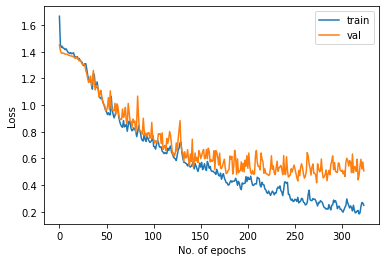

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

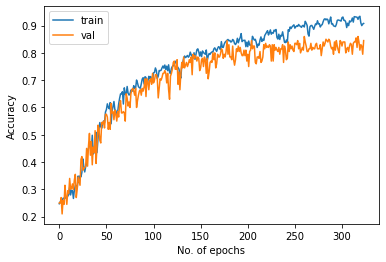

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
saved_model = load_model("/content/drive/MyDrive/Project/Final_model.h5")
#Testing the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
scores,acc = saved_model.evaluate(X_test, y_test,verbose=0)
model.summary()
print("Accuracy on the test set: {}%".format(acc*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 512)               1132544   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 1,134,596
Trainable params: 1,134,596
Non-trainable params: 0
_________________________________________________________________
Accuracy on the test set: 86.50000095367432%


Prediction and confusion matrix

In [ ]:
def getConfusionMatrix(self, y_true, y_pred, speaker_labels):
        
        # Calculate Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        
        print(cm)
        
        # Instantiate Plot Variables
        cmap = plt.cm.Blues # Color map for confusion matrix
        title = "Confusion Matrix" # Plot title
        ticks = np.arange(len(speaker_labels))
        fmt = 'd' # Data format
        thresh = cm.max()/2. # Treshold
        
        # Plot Confusion Matrix
        plt.figure(figsize=(20, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xticks(ticks, speaker_labels, rotation=90)
        plt.yticks(ticks, speaker_labels)
        
        for (i, j) in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     color='white' if cm[i, j] > thresh else 'black')
        
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [ ]:
class_dict={'ABUSE':1, 'BLACK':2, 'EXACTLY':3, 'CRIME':4}

In [ ]:
y_true=[]
y_pred=[]
count=0
for word in class_dict.keys():
  for i in range(count,count+50):
    test = X_test[i].reshape((1,25,40))
    y = int(np.argmax(model.predict(test), axis=-1))
    temp = list(class_dict.keys())
    y_true.append(temp[class_dict[word]-1])
    y_pred.append(temp[y])
    print("The predicted word for {} is {} ".format(temp[class_dict[word]-1],temp[y]))
  count+=50

The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is CRIME 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is EXACTLY 
The predicted word for ABUSE is ABUSE 
The predicted word for ABUSE is BLACK 
The predicted word for ABUSE is CRIME 
The predicted word for 

[[45  1  3  1]
 [ 1 43  4  2]
 [ 3  5 40  2]
 [ 2  6  1 41]]


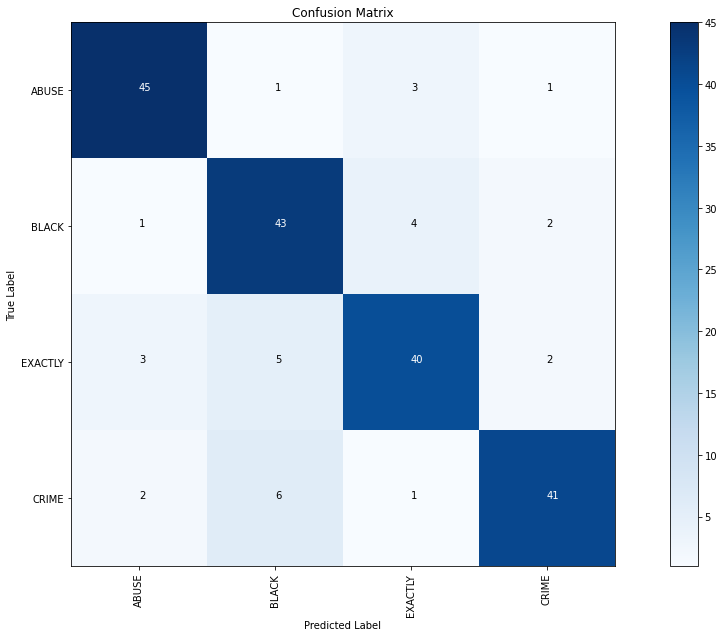

In [ ]:
speaker_labels=list(class_dict.keys())
getConfusionMatrix(_,y_true,y_pred,speaker_labels)